In [1]:
from environment import stock
from DQN import DQN, seed_torch
import matplotlib.pyplot as plt
import pandas as pd
from GRU import GRU
import numpy as np
import torch
def game_step(observation, step=None, train=True, show_log=False):
    action = RL.choose_action(observation, train)
    observation_, reward, done = env.step(action, show_log=show_log)
    RL.store_transition(observation, action, reward, observation_)
    if step and step > 200 and step % 5 == 0:
        RL.learn()
    return observation_, done


def run(max_round: int):
    step = 0
    for episode in range(max_round):
        observation = env.reset()
        while True:
            observation, done = game_step(observation, step=step)
            if done:
                break
            step += 1
        temp.append(env.total_profit)
        if env.total_profit > env.best_profit:
            env.best_profit = env.total_profit
            env.draw()
        print('epoch:%d, total_profit:%.3f' % (episode+1, env.total_profit))


# def BackTest(env: stock, show_log=True):
#     observation = env.reset()
#     while True:
#         observation, done = game_step(
#             observation, train=False, show_log=show_log)
#         if done:
#             break
#     profit.append(env.total_profit)
#     if env.total_profit > env.best_profit:
#         env.best_profit = env.total_profit
#         env.draw()
#     print('total_profit:%.3f' % (env.total_profit))
#     return env


seed_torch()
max_round =30
file_path = 'data/BCHAIN-MKPRU.csv'
df = pd.read_csv(file_path)
gru = torch.load('gru_bit.pth')
total=[]
i=0
for alpha in [0.005,0.01,0.015,0.02,0.025]:
    temp0=[]
    temp=[]
    env = stock(df, gru, alpha=alpha, init_money=1000.0)
    RL = DQN(env.n_actions, env.n_features, lr=0.01, reward_decay=0.9,
                    e_greedy=0.9, replace_target_iter=200, memory_size=5000, batch_size=512)
    run(max_round)
    temp0.append(np.array(temp).mean())
    i+=1
total.append(temp0)
# env = BackTest(env, show_log=False)
# print(env.best_profit)


********** 1 **********


d:\vs_code_work\ZM\DQN.py:69: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  observation = torch.tensor(observation, dtype=torch.float32).to(device)


epoch:1, total_profit:-961.648
epoch:2, total_profit:-908.615
epoch:3, total_profit:1692.331
epoch:4, total_profit:19698.106
epoch:5, total_profit:11049.833
epoch:6, total_profit:6624.492
epoch:7, total_profit:678.892
epoch:8, total_profit:7555.808
epoch:9, total_profit:2584.562
epoch:10, total_profit:1186.145
epoch:11, total_profit:17037.904
epoch:12, total_profit:11023.308
epoch:13, total_profit:937.634
epoch:14, total_profit:657.467
epoch:15, total_profit:1097.980
epoch:16, total_profit:3257.808
epoch:17, total_profit:497.469
epoch:18, total_profit:4376.917
epoch:19, total_profit:856.491
epoch:20, total_profit:11.344
epoch:21, total_profit:-351.334
epoch:22, total_profit:-131.238
epoch:23, total_profit:-92.317
epoch:24, total_profit:3176.752
epoch:25, total_profit:1623.699
epoch:26, total_profit:635.408
epoch:27, total_profit:249.201
epoch:28, total_profit:3319.563
epoch:29, total_profit:1160.661
epoch:30, total_profit:5754.353
********** 2 **********
epoch:1, total_profit:-961.329


C:\Users\Guo_0206\AppData\Local\Temp/ipykernel_14936/4079362893.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


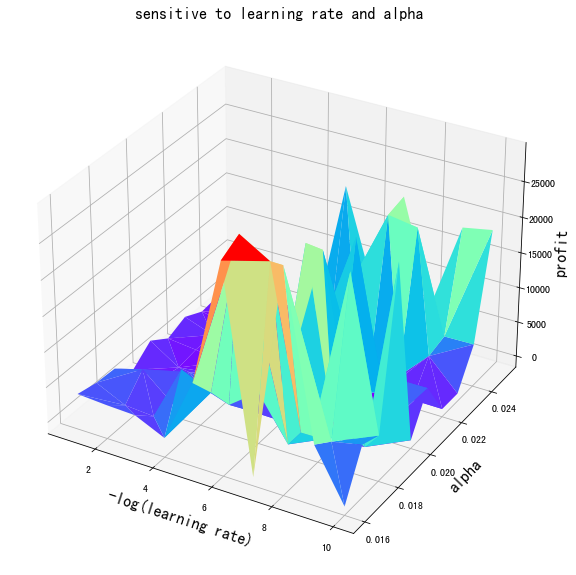

In [38]:
lrs=[1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10]
alphas=[0.016,0.017,0.018,0.019,0.020,0.021,0.022,0.023,0.024,0.025]
x,y,z=[],[],[]
for i,X in enumerate(lrs):
    for j,Y in enumerate(alphas):
        x.append(-np.log10(X))
        y.append(Y)
        z.append(total[i][j])
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, z, cmap='rainbow', linewidth=0.01)
ax.set_xlabel('-log(learning rate)',fontsize=16)
ax.set_ylabel('alpha',fontsize=16)
ax.set_zlabel('profit',fontsize=16)
plt.title('sensitive to learning rate and alpha',fontsize=16)
plt.savefig('sen.jpg')